(lecture12:standard-normal-quantiles)=
# Quantiles of the standard Normal

Quantiles are a great way to summarize a random variable with a few numbers.
Let's start with the standard Normal.
Take:

$$
Z\sim N(0,1).
$$

The definition of is this:

> The $q$ quantile of $Z$ is the value $z_q$ such that the probability of $Z$ being less that $z_q$ is $q$.

Mathematically, you want to find a value $z_q$

$$
\Phi(z_q) = q.
$$

## The median of the standard Normal
For example, the $0.5$ quantile $z_{0.5}$ satisfies the property:

$$
\Phi(z_{0.5}) = 0.5.
$$

This is known as the *median* of $Z$.
In words, 50\% of the probability of $Z$ to the left of the median.
For the standard normal, we have because of the symmetry of the PDF about zero that:

$$
z_{0.5} = 0.
$$

Of course, `scipy.stats` knows about the median:

In [1]:
MAKE_BOOK_FIGURES=False

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')
import seaborn as sns
sns.set_context("paper")
sns.set_style("ticks")

def set_book_style():
    plt.style.use('seaborn-v0_8-white') 
    sns.set_style("ticks")
    sns.set_palette("deep")

    mpl.rcParams.update({
        # Font settings
        'font.family': 'serif',  # For academic publishing
        'font.size': 8,  # As requested, 10pt font
        'axes.labelsize': 8,
        'axes.titlesize': 8,
        'xtick.labelsize': 7,  # Slightly smaller for better readability
        'ytick.labelsize': 7,
        'legend.fontsize': 7,
        
        # Line and marker settings for consistency
        'axes.linewidth': 0.5,
        'grid.linewidth': 0.5,
        'lines.linewidth': 1.0,
        'lines.markersize': 4,
        
        # Layout to prevent clipped labels
        'figure.constrained_layout.use': True,
        
        # Default DPI (will override when saving)
        'figure.dpi': 600,
        'savefig.dpi': 600,
        
        # Despine - remove top and right spines
        'axes.spines.top': False,
        'axes.spines.right': False,
        
        # Remove legend frame
        'legend.frameon': False,
        
        # Additional trim settings
        'figure.autolayout': True,  # Alternative to constrained_layout
        'savefig.bbox': 'tight',    # Trim when saving
        'savefig.pad_inches': 0.1   # Small padding to ensure nothing gets cut off
    })

def save_for_book(fig, filename, is_vector=True, **kwargs):
    """
    Save a figure with book-optimized settings.
    
    Parameters:
    -----------
    fig : matplotlib figure
        The figure to save
    filename : str
        Filename without extension
    is_vector : bool
        If True, saves as vector at 1000 dpi. If False, saves as raster at 600 dpi.
    **kwargs : dict
        Additional kwargs to pass to savefig
    """    
    # Set appropriate DPI and format based on figure type
    if is_vector:
        dpi = 1000
        ext = '.pdf'
    else:
        dpi = 600
        ext = '.tif'
    
    # Save the figure with book settings
    fig.savefig(f"{filename}{ext}", dpi=dpi, **kwargs)


def make_full_width_fig():
    return plt.subplots(figsize=(4.7, 2.9), constrained_layout=True)

def make_half_width_fig():
    return plt.subplots(figsize=(2.35, 1.45), constrained_layout=True)

if MAKE_BOOK_FIGURES:
    set_book_style()
make_full_width_fig = make_full_width_fig if MAKE_BOOK_FIGURES else lambda: plt.subplots()
make_half_width_fig = make_half_width_fig if MAKE_BOOK_FIGURES else lambda: plt.subplots()

import numpy as np
import scipy.stats as st

In [2]:
Z = st.norm()
Z.median()

0.0

## Other quantiles of the standard Normal

Another interesting quantile is $z_{0.025}$.
So, $z_{0.025}$ marks the point below which $Z$ lies with probability $2.5$\%.
This is not trivial to find though.
You really need to solve the nonlinear equation:

$$
\Phi(z_{0.025}) = 0.025.
$$

But `scipy.stats` can do this for you using the function `Z.ppf()`:

In [3]:
z_025 = Z.ppf(0.025)
print(f'z_025 = {z_025:1.2f}')

z_025 = -1.96


Let's verify that this is indeed giving me the $0.025$ quantile.
If I plug it in the CDF I should get $0.025$:

In [4]:
print(f'Phi(z_025) = {Z.cdf(z_025):1.3f}')

Phi(z_025) = 0.025


Okay, it looks good!

Let's also find $z_{0.975}$:

In [5]:
z_975 = Z.ppf(0.975)
print(f'z_975 = {z_975:1.2f}')

z_975 = 1.96


Nice! This is just $-z_{0.025}$. We could have guessed it!

## Credible intervals
Alright, these two quantiles are particularly important.
Why, because the probability that $Z$ is between them is 95\%!
We we could write:

> $Z$ is between -1.96 and +1.96 with probability 95\%.

This is a very nice summary of the uncertainty in $Z$.
This is called the 95% (central) *credible interval* of $Z$.

Now if you are like me, you would simplify this a bit more by writing:

> $Z$ is between -2 and +2 with probability (approximately) 95\%.

Who wants to remember that 1.96...

Let's visualize the 95% (central) credible interval by shaded the PDF:

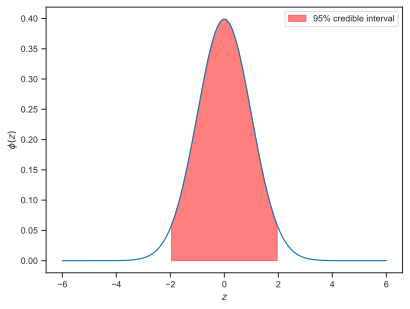

In [6]:
fig, ax = make_full_width_fig()
zs = np.linspace(-6.0, 6.0, 200)
Phis = Z.pdf(zs)
ax.plot(zs, Phis)
idx = (zs >= -2) & (zs <= 2)
ax.fill_between(zs[idx], 0.0, Phis[idx], color='r', alpha=0.5, label='95% credible interval')
ax.set_xlabel('$z$')
ax.set_ylabel(r'$\phi(z)$')
plt.legend(loc='best')
save_for_book(fig, 'ch12.fig6')

Let's end by finding the 99.9% credible interval of $Z$.
We need the following quantiles:

+ $z_{0.001}$:

In [7]:
z_001 = Z.ppf(0.001)
print(f'z_001 = {z_001:1.2f}')

z_001 = -3.09


+ $z_{0.999}$:

In [8]:
z_999 = Z.ppf(0.999)
print(f'z_999 = {z_999:1.2f}')

z_999 = 3.09


So, we can now write:

> $Z$ is between -3.09 and 3.09 with probability 99.8%.

Or the more practical:

> $Z$ is between -3 and 3 with probability (about) 99.8%.

How can I think about this intuitively?
Well, if you sample many many times from $Z$ approximately 2 out of a 1000 samples will be outside of the interval $[-3, 3]$.
Let's test this computationally:

In [9]:
# Take 1,000,000 samples
zs = Z.rvs(size=1_000_000)
# Count the number of zs that are outside the range
idx = (zs < -3) | (zs > 3)
# How many samples out of 1,000?
zs[idx].size / 1_000_000 * 1_000

2.626

## Questions

+ Modify the code above to find the 99.99% central credible interval of $Z$.